In [1]:
import fns
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


Loading BokehJS ...

In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
plt.style.use(['seaborn-paper'])
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [5]:
N, g, tauv, i, nu = 1000, 14,15,0,200
T = 100

gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=45,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 50,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
print(gpu.lowspthresh)
gpu.lowspthresh = 1.5
gpu.dt = 0.1
gpu.ratio = 200
gpu.FACT = 200
gpu.runTFSimul()

    

1.5


InvalidArgumentError: Cannot assign a device to node 'Variable': Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and devices: 
Assign: CPU 
Variable: CPU 
	 [[Node: Variable = Variable[container="", dtype=DT_INT32, shape=[100,1], shared_name="", _device="/device:GPU:0"]()]]

Caused by op 'Variable', defined at:
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-ece85854c941>", line 20, in <module>
    gpu.runTFSimul()
  File "/mnt/DATA/gp1514/Projects/github/cortex/notebooks/fns/functionsTFhardbound.py", line 144, in runTFSimul
    input = tf.cast(tf.Variable(self.input), tf.float32)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 225, in __init__
    expected_shape=expected_shape)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 350, in _init_from_args
    shared_name="")
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 771, in _variable
    name=name)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 750, in apply_op
    op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2242, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1134, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device to node 'Variable': Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and devices: 
Assign: CPU 
Variable: CPU 
	 [[Node: Variable = Variable[container="", dtype=DT_INT32, shape=[100,1], shared_name="", _device="/device:GPU:0"]()]]


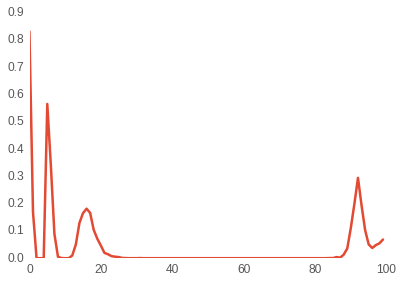

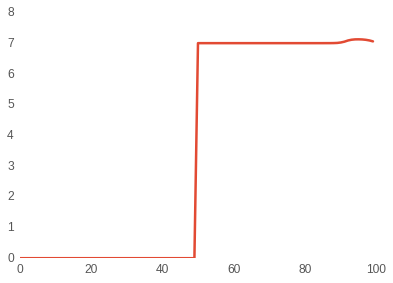

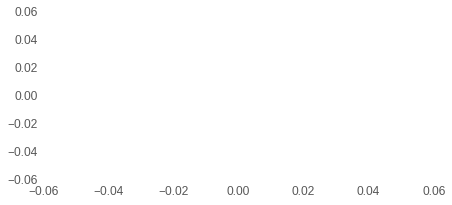

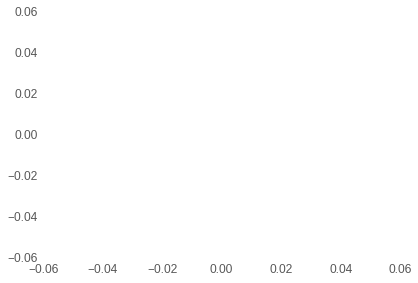

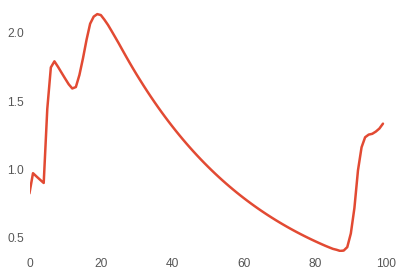

In [7]:
plt.plot(gpu.vvm)
plt.figure()
plt.plot(gpu.gamma)

t0 = 8000
t1 = 9000
plt.figure(figsize=(7,3))
plt.plot(gpu.vvm[t0:t1])
plt.figure()
plt.plot(gpu.gamma[t0:t1])
plt.figure()
plt.plot(np.mean(np.array(gpu.lowsp).reshape(T,N).transpose(), axis=0))